In [ ]:
from google.colab import drive
drive.mount("/content/drive")

#to confirm gpu access
import tensorflow as tf
device_name=tf.test.gpu_device_name()
print(device_name)

Mounted at /content/drive
/device:GPU:0


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
os.chdir('drive/My Drive/nlp_project')

In [ ]:
!ls

all_data.csv			     test_private_expanded.csv
identity_individual_annotations.csv  test_public_expanded.csv
sample_submission.csv		     toxicity_individual_annotations.csv
test.csv			     train.csv


In [ ]:
all=pd.read_csv('all_data.csv')
annotator_data=pd.read_csv('toxicity_individual_annotations.csv')

In [ ]:
annotator_data

,id,worker,toxic,severe_toxic,identity_attack,insult,obscene,sexual_explicit,threat
0,59859,0,1,0,0,1,1,0,0
1,59859,1,1,0,0,0,1,0,0
2,59859,2,1,0,0,1,1,0,0
3,59859,3,1,1,0,0,1,0,0
4,59859,4,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
15855261,6333871,3838,1,0,0,1,0,0,0
15855262,6333947,5404,0,0,0,0,0,0,0
15855263,6333947,5321,0,0,0,0,0,0,0
15855264,6333947,1072,0,0,0,0,0,0,0


In [ ]:
number_of_annotators={}
annotator_data=annotator_data[:10000000]
unique_comments=set(annotator_data['id'])
annotator_counts=list(annotator_data['id'])
for i in unique_comments:
  number_of_annotators[i]=annotator_counts.count(i)

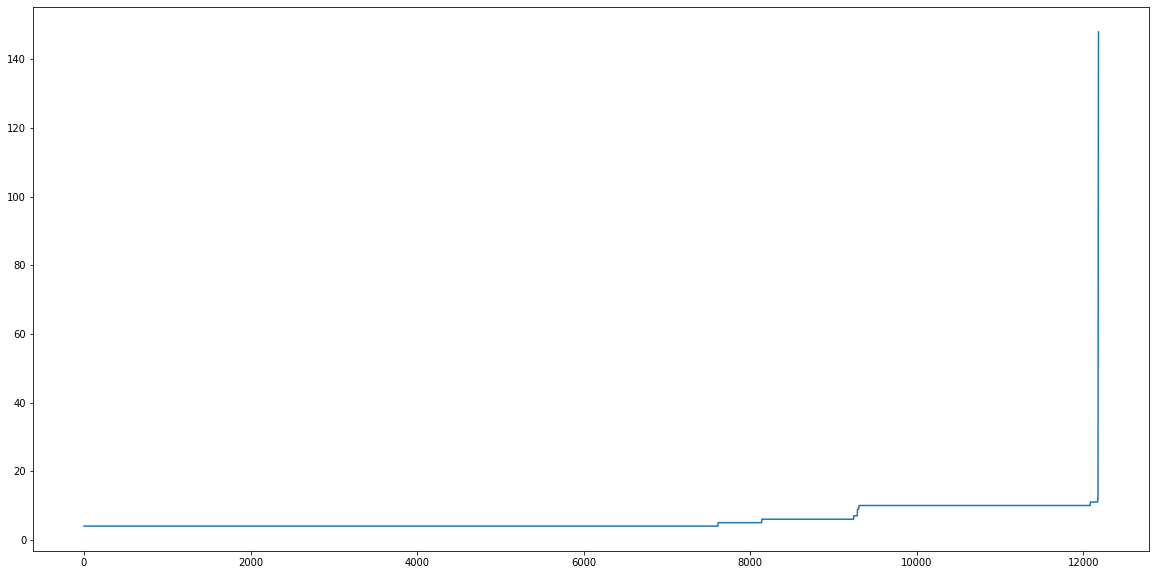

In [ ]:
l=list(number_of_annotators.values())
X=[]
Y=[]
l.sort()
for x in range(len(l)):
  if l[x]<200:
    X.append(x)
    Y.append(l[x])
plt.figure(figsize=(20,10))
plt.plot(X,Y)

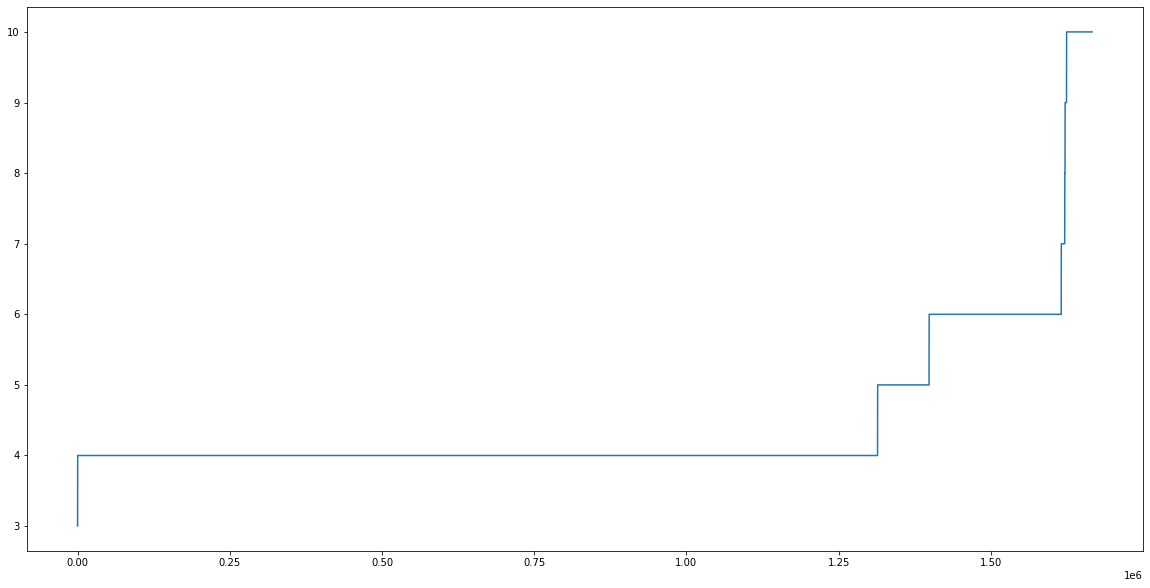

In [ ]:
Y=list(all['toxicity_annotator_count'])
Y.sort()
y=Y[:int(5*len(Y)/6)]
X=[i for i in range(len(y))]
plt.figure(figsize=(20,10))
plt.plot(X,y)


In [ ]:
for i in range(len(Y)):
  if Y[i]>70:
    print(i)
    break

1970089


Hyperparameter
Threshold that determines if a comment is ambiguous
If the number of annotators for a comment is greater than 70 then we will consider the comment to be ambiguous. 29427 comments from the entire dataset(1999516) are thus considered ambiguus. Now, we will construct our own dataset using a fraction of ambiguous and unambiguous comments, this fraction will be considered as another hyperparameter

In [ ]:
len(Y)

1999516

In [ ]:
len(Y)-1970089

29427

In [ ]:
genderdf=pd.read_csv('identity_individual_annotations.csv')

In [ ]:
print(set(genderdf['gender']))

{'female other none', 'male female other none', 'male other none', 'male female none', 'other', 'male female', 'female transgender none', 'none', 'male transgender none', 'male none', 'female transgender other', 'female transgender', 'transgender other none', 'male other', 'male transgender other', 'male female transgender', 'male female other', 'transgender none', 'female other', 'male female transgender other', 'female none', 'male transgender', 'male', 'transgender other', 'other none', 'female', 'transgender', 'male female transgender none'}


In [ ]:
all_annotator_gender=pd.concat([all.set_index('id'),genderdf.set_index('id')],axis=1,join='inner')

InvalidIndexError: ignored

In [ ]:
rows=len(all.index)
clean=all[0:int(rows/2)]
noisy=all[int(rows/2)+1:]

In [ ]:
clean.columns

In [ ]:
clean['split']

In [ ]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [ ]:
test.columns

In [ ]:
unique_toxicity=set(train['target'])
toxicity_counts=list(train['target'])
X=[]
Y=[]
l=list(unique_toxicity)
l.sort()
for x in l:
  if x != 0:
    X.append(x)
    Y.append(toxicity_counts.count(x))


In [ ]:
l

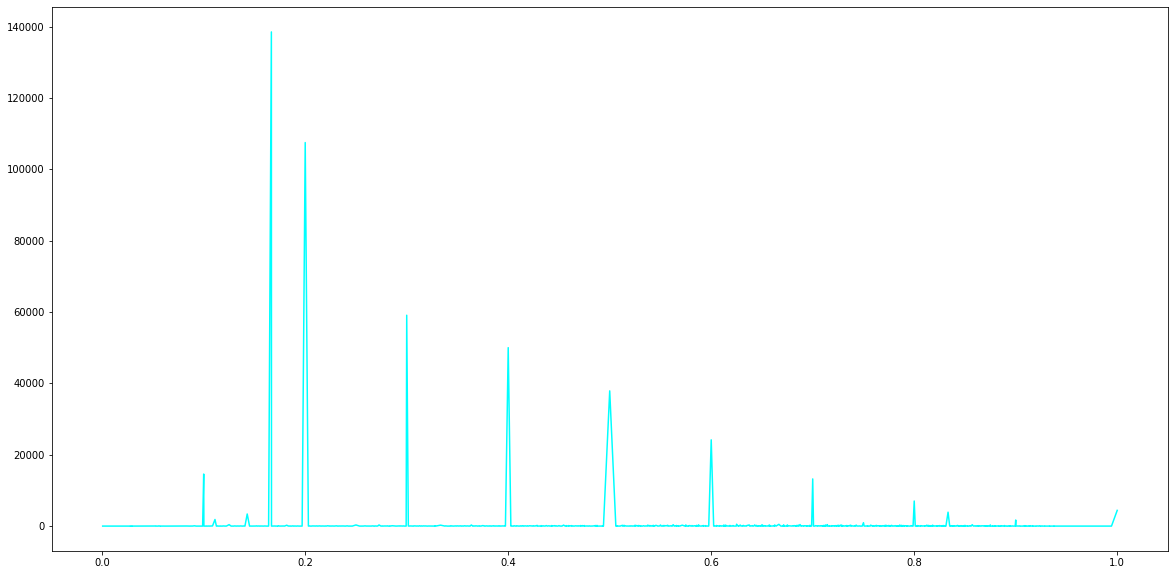

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(X,Y,linestyle='-',color='cyan')

In [ ]:
(train.columns

Index(['id', 'target', 'comment_text', 'severe_toxicity', 'obscene',
       'identity_attack', 'insult', 'threat', 'asian', 'atheist', 'bisexual',
       'black', 'buddhist', 'christian', 'female', 'heterosexual', 'hindu',
       'homosexual_gay_or_lesbian', 'intellectual_or_learning_disability',
       'jewish', 'latino', 'male', 'muslim', 'other_disability',
       'other_gender', 'other_race_or_ethnicity', 'other_religion',
       'other_sexual_orientation', 'physical_disability',
       'psychiatric_or_mental_illness', 'transgender', 'white', 'created_date',
       'publication_id', 'parent_id', 'article_id', 'rating', 'funny', 'wow',
       'sad', 'likes', 'disagree', 'sexual_explicit',
       'identity_annotator_count', 'toxicity_annotator_count'],
      dtype='object')

In [ ]:
l=pd.DataFrame([1,2,3,4])
l.describe()

,0
count,4.000000
mean,2.500000
std,1.290994
min,1.000000
25%,1.750000
50%,2.500000
75%,3.250000
max,4.000000


In [ ]:
all

,id,comment_text,split,created_date,publication_id,parent_id,article_id,rating,funny,wow,...,white,asian,latino,other_race_or_ethnicity,physical_disability,intellectual_or_learning_disability,psychiatric_or_mental_illness,other_disability,identity_annotator_count,toxicity_annotator_count
0,1083994,He got his money... now he lies in wait till a...,train,2017-03-06 15:21:53.675241+00,21,NaN,317120,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,67
1,650904,Mad dog will surely put the liberals in mental...,train,2016-12-02 16:44:21.329535+00,21,NaN,154086,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
2,5902188,And Trump continues his lifelong cowardice by ...,train,2017-09-05 19:05:32.341360+00,55,NaN,374342,approved,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,63
3,7084460,"""while arresting a man for resisting arrest"".\...",test,2016-11-01 16:53:33.561631+00,13,NaN,149218,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,76
4,5410943,Tucker and Paul are both total bad ass mofo's.,train,2017-06-14 05:08:21.997315+00,21,NaN,344096,approved,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999511,1018736,Another man shamming article. If white men did...,train,2017-02-20 07:20:49.964620+00,54,NaN,169202,approved,0,0,...,0.8,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999512,340016,"""no matter what is put in front of you regardi...",train,2016-06-06 06:43:04.780968+00,21,339965.0,137961,approved,0,0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,10,10
1999513,919629,The Democrat party aided and abetted by it's M...,train,2017-01-30 02:44:29.168863+00,54,NaN,164845,rejected,0,1,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,11,10
1999514,5165492,I just don't find her a very good representati...,train,2017-04-22 18:42:02.442987+00,54,NaN,328877,approved,1,0,...,0.0,0.0,0.0,0.0,0.003717,0.0,0.0,0.00000,269,10
